In [2]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"
import keras
print(keras.__version__) 
import tensorflow as tf

print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))

2024-05-15 22:00:30.000854: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-15 22:00:30.256470: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-15 22:00:30.920222: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


3.3.3
2.16.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-05-15 22:00:32.958892: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 22:00:33.080453: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 22:00:33.081094: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [3]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import glob
from mtcnn import MTCNN
import imutils

def crop_ds(ds_name, sub_ds, class_name, image_format='jpg'):

    detector = MTCNN()
    min_conf = 0.9  
    offset = 20

    os.makedirs('cropped_ds/'+sub_ds, exist_ok=True)
    os.makedirs('cropped_ds/'+sub_ds+'/'+class_name, exist_ok=True)

    image_list = glob.glob(ds_name+"/"+sub_ds+"/"+class_name+"/*."+image_format)
    # print(len(image_list))
    new_image_list = ['/'.join(x.split('/')[1:]) for x in image_list]
    # print(new_image_list)
    cropped_list = glob.glob('cropped_ds'+"/"+sub_ds+"/"+class_name+"/*."+image_format)
    new_cropped_list = ['/'.join(x.split('/')[1:]) for x in cropped_list]
    # print(new_cropped_list)
    left = set(new_image_list) - set(new_cropped_list)
    left_list = [ds_name+"/"+x for x in left]
    print(len(left_list))
    for image_path in left_list:
    # for image_path in image_list:
        # image_path = image_list[i]
        new_im_path = os.path.join('cropped_ds', sub_ds, '/'.join(image_path.split('/')[-2:]))
        
        
        print(new_im_path)
        img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
        # img = imutils.resize(img, width=1280)
        h,w,ch = img.shape 
        area = 0
        final_face = None
        detections = detector.detect_faces(img)

        for det in detections:
            if det['confidence'] >= min_conf:
                x, y, width, height = det['box']
                object = img[max(y-offset,0):min(y+height+offset,h), max(0,x-offset):min(w,x+width+offset), :]
                object_area = object.shape[0]*object.shape[1]
                if (object_area > area):
                    area = object_area
                    final_face = object
                # print(object.shape)
        cv2.imwrite(new_im_path, cv2.cvtColor(final_face, cv2.COLOR_RGB2BGR))               

In [5]:
# It takes time and memory, so uncomment and run one after another
# crop_ds('shapeofyou-2', 'train', 'Heart')
# crop_ds('shapeofyou-2', 'train', 'Oblong')
# crop_ds('shapeofyou-2', 'train', 'Oval')
# crop_ds('shapeofyou-2', 'train', 'Round')
# crop_ds('shapeofyou-2', 'train', 'Square')

In [6]:
crop_ds('shapeofyou-2', 'test', 'Heart')
crop_ds('shapeofyou-2', 'test', 'Oblong')
crop_ds('shapeofyou-2', 'test', 'Oval')
crop_ds('shapeofyou-2', 'test', 'Round')
crop_ds('shapeofyou-2', 'test', 'Square')

2024-05-15 22:00:37.417960: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 22:00:37.418120: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-05-15 22:00:37.418180: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

0
38
cropped_ds/test/Oblong/oblong-933-_jpg.rf.696257ec14f11e5fa110602b7637a443.jpg


I0000 00:00:1715803237.936238 1012817 service.cc:145] XLA service 0x74f3dc019120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715803237.936278 1012817 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 2050, Compute Capability 8.6
2024-05-15 22:00:37.953052: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-15 22:00:38.014181: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


I0000 00:00:1715803238.988924 1012817 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 478ms/step
cropped_ds/test/Oblong/oblong-865-_jpg.rf.a5b7f96f8646b9cbc16ecc28c6386c32.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 492ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
(600, 400, 3)


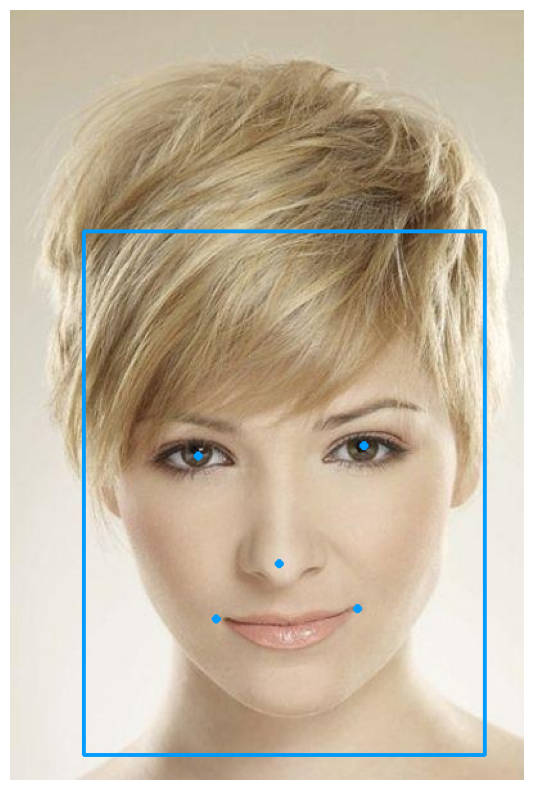

In [11]:
from mtcnn import MTCNN
# https://github.com/ipazc/mtcnn/tree/master
image_path = 'shapeofyou-2/train/Oval/oval-735-_jpg.rf.250a94bb29ff9f51398cf6f63f98dfc5.jpg'
img = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
detector = MTCNN()
detections = detector.detect_faces(img)
detections
img_with_dets = img.copy()
min_conf = 0.9
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        keypoints = det['keypoints']
        cv2.rectangle(img_with_dets, (x-20,y-20), (x+width+20,y+height+20), (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['left_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['right_eye']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['nose']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_left']), 2, (0,155,255), 2)
        cv2.circle(img_with_dets, (keypoints['mouth_right']), 2, (0,155,255), 2)
plt.figure(figsize = (10,10))
plt.imshow(img_with_dets)
plt.axis('off')
print(img_with_dets.shape)

(-0.5, 169.5, 227.5, -0.5)

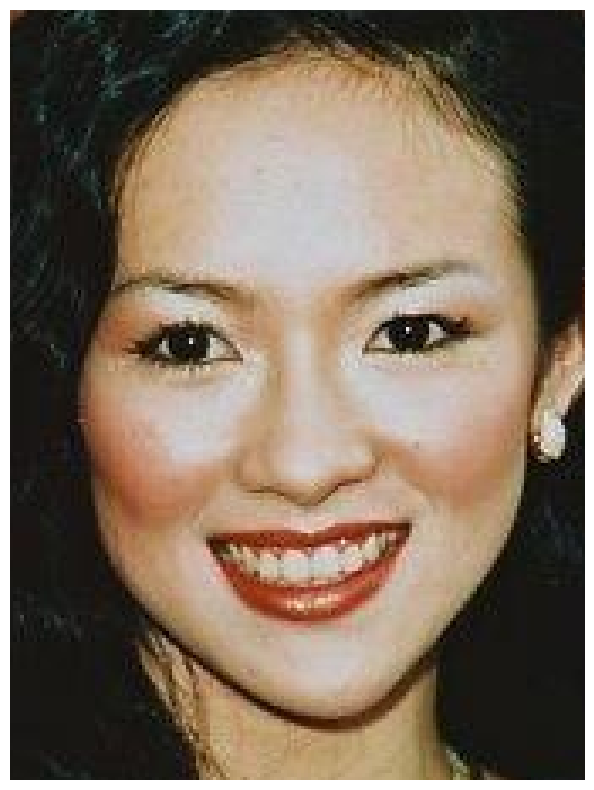

In [52]:
offset = 20
h,w,ch = img_with_dets.shape
area = 0
final_face = None
for det in detections:
    if det['confidence'] >= min_conf:
        x, y, width, height = det['box']
        object = img[max(y-offset,0):min(y+height+offset,h), max(0,x-offset):min(w,x+width+offset), :]
        object_area = object.shape[0]*object.shape[1]
        if (object_area > area):
            area = object_area
            final_face = object.copy()
new_im_path = os.path.join('cropped_ds', 'train', '/'.join(image_path.split('/')[-2:]))
cv2.imwrite(new_im_path, cv2.cvtColor(final_face, cv2.COLOR_RGB2BGR))
plt.figure(figsize = (10,10))
plt.imshow(final_face)
plt.axis('off')

In [ ]:
IMAGE_RES = 150
BATCH_SIZE = 64

train_ds = keras.utils.image_dataset_from_directory(
    "shapeofyou-2/train/",
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES, IMAGE_RES)
)

In [ ]:
valid_ds = keras.utils.image_dataset_from_directory(
    "shapeofyou-2/valid/",
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES, IMAGE_RES)
)

In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    "shapeofyou-2/test/",
    labels="inferred",
    label_mode="int",
    batch_size=BATCH_SIZE,
    image_size=(IMAGE_RES, IMAGE_RES)
)

In [ ]:
class_names = np.asarray(train_ds.class_names)
NUM_CLASSES = len(class_names)
print(train_ds.class_names)

In [ ]:
labels = list(train_ds.unbatch().map(lambda x,y: y).as_numpy_iterator())
# print(labels)
classes, counts = np.unique(labels, return_counts=True)

plt.ylabel('Counts')
plt.xlabel('Labels')
plt.bar(class_names[classes], counts) 

In [ ]:
def plot_batch(ds, class_names, num, predict=False, model=None):

    plt.figure(figsize=(10, 10))
    image_batch, label_batch = next(iter(ds.take(1)))
    image_batch = image_batch.numpy().astype(int)
    label_batch = label_batch.numpy()

    if predict:
        predicted_batch = model.predict(image_batch)
        predicted_ids = np.argmax(predicted_batch, axis=1)
        
    for i in range(num):
        ax = plt.subplot(int(np.sqrt(num)), int(np.sqrt(num)), i + 1)
        plt.imshow(image_batch[i])

        if predict:
            color = "blue" if predicted_ids[i] == label_batch[i] else "red"
            plt.title(class_names[predicted_ids[i]] + '('+class_names[label_batch[i]]+')', color=color)
        else:
            plt.title(class_names[label_batch[i]], color="blue")
        plt.axis("off")

In [ ]:

plot_batch(train_ds,class_names,9)

In [ ]:
augmenter = keras.Sequential(
    [
        keras.layers.RandomFlip(mode="horizontal"),
        # keras.layers.RandomRotation(0.1),
        # keras.layers.RandomTranslation(0.1,0.1),
        # keras.layers.RandomZoom(0.1,0.1),
        # keras.layers.RandomContrast(0.2),
        # keras.layers.RandomBrightness(0.2)        
    ],
)

def preprocess_data(images, labels):
    images = augmenter(images)
    return images, labels

In [ ]:
train_batched_dataset = train_ds.prefetch(1)

In [ ]:
valid_batched_dataset = valid_ds.prefetch(1)

In [ ]:

test_batches = test_ds.prefetch(1)

In [ ]:

plot_batch(train_batched_dataset,class_names,9)

In [ ]:
def create_base_model(input_shape: tuple[int, int, int] = (IMAGE_RES, IMAGE_RES, 3),
                      output_shape: int = NUM_CLASSES,
                      learning_rate: float = 0.001,
                      training: bool = False) -> keras.Model:
    
    base_model = keras.applications.Xception(
        weights="imagenet",  # Load weights pre-trained on ImageNet.
        input_shape=input_shape,
        include_top=False,
    )  # Do not include the ImageNet classifier at the top.

    # Freeze the base_model
    base_model.trainable = training

    # Create new model on top
    inputs = keras.Input(shape=(IMAGE_RES, IMAGE_RES, 3))

    # Pre-trained MobileNetV2 weights requires that input be scaled
    # from (0, 255) to a range of (-1., +1.), the rescaling layer
    # outputs: `(inputs * scale) + offset`
    scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
    x = scale_layer(inputs)
    # or map dataset with this function:
    # def preprocess(images, labels):
    #   return tf.keras.applications.mobilenet_v2.preprocess_input(images), labels

    # The base model contains batchnorm layers. We want to keep them in inference mode
    # when we unfreeze the base model for fine-tuning, so we make sure that the
    # base_model is running in inference mode here.
    x = base_model(x, training=False)
    x = keras.layers.GlobalAveragePooling2D()(x)
    x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
    outputs = keras.layers.Dense(output_shape, activation="softmax")(x)
    model = keras.Model(inputs, outputs)

    model.summary(show_trainable=True)
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss=keras.losses.SparseCategoricalCrossentropy(),
        metrics=[keras.metrics.SparseCategoricalAccuracy()],
    )
    return model

In [ ]:
model = create_base_model()

In [ ]:
checkpoint_path = ".checkpoints/checkpoint.weights.h5"
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=7),
    keras.callbacks.TensorBoard(log_dir='./logs'),
    keras.callbacks.CSVLogger('./logs/fine-tuning.log', append=True),
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                    save_weights_only=True, # set to False to save the entire model
                                    save_best_only=True, # save only the best model weights instead of a model every epoch
                                    save_freq="epoch", # save every epoch
                                    verbose=1)
]

In [ ]:
initial_epochs = 5

history = model.fit(train_batched_dataset, 
                    epochs=initial_epochs, 
                    validation_data=valid_batched_dataset, 
                    callbacks=my_callbacks)

In [ ]:
model_ev = model.evaluate(test_batches)
model_ev

In [ ]:
def plot_hist(hist, initial_epochs):
    acc = hist['sparse_categorical_accuracy']
    val_acc = hist['val_sparse_categorical_accuracy']

    loss = hist['loss']
    val_loss = hist['val_loss']

    epochs_range = range(len(hist['loss']))

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    if initial_epochs:        
        plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    if initial_epochs:        
        plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:

plot_hist(history.history, 1)